In [1]:
import os
import glob
import numpy
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
import geopandas
from descartes import PolygonPatch
import random
import numpy as np
import random
from rasterio.windows import from_bounds
from shapely.geometry import Polygon
random.seed(10)

In [2]:
data = "/Users/nish/Downloads/AOI_11_Rotterdam"

In [3]:
test_no = 25

In [4]:
geojsons = sorted(glob.glob(f"{os.path.join(data, 'geojson_buildings')}/*.geojson"), key=lambda s: int(s.split("_tile_")[1].split('.')[0]))
test_geo = geojsons[test_no]
test_geo

'/Users/nish/Downloads/AOI_11_Rotterdam/geojson_buildings/SN6_Train_AOI_11_Rotterdam_Buildings_20190804120223_20190804120456_tile_63.geojson'

In [5]:
tifs = sorted(glob.glob(f"{os.path.join(data, 'PS-RGBNIR')}/*.tif"), key=lambda s: int(s.split("_tile_")[1].split('.')[0]))
test_tif = tifs[test_no]
test_tif

'/Users/nish/Downloads/AOI_11_Rotterdam/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804120223_20190804120456_tile_63.tif'

In [6]:
datas = list(zip(tifs, geojsons))
datas[test_no]

('/Users/nish/Downloads/AOI_11_Rotterdam/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804120223_20190804120456_tile_63.tif',
 '/Users/nish/Downloads/AOI_11_Rotterdam/geojson_buildings/SN6_Train_AOI_11_Rotterdam_Buildings_20190804120223_20190804120456_tile_63.geojson')

In [7]:
win = Window(512, 512, 512, 512)

In [8]:
with rio.open(test_tif) as src:
    window = from_bounds(*src.bounds, src.transform)
    srcdata = src.read(window=window)

In [9]:
src = rio.open(test_tif)

In [10]:
win.width

512

In [11]:
src.shape

(900, 900)

In [12]:
src.bounds

BoundingBox(left=594686.1399464327, bottom=5751614.174681294, right=595136.1382388433, top=5752064.1729737045)

In [13]:
srcdata[1].shape

(900, 900)

In [14]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 900, 'height': 900, 'count': 4, 'crs': CRS.from_epsg(32631), 'transform': Affine(0.49999810267850525, 0.0, 594686.1399464327,
       0.0, -0.49999810267850525, 5752064.1729737045), 'tiled': False, 'interleave': 'pixel'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


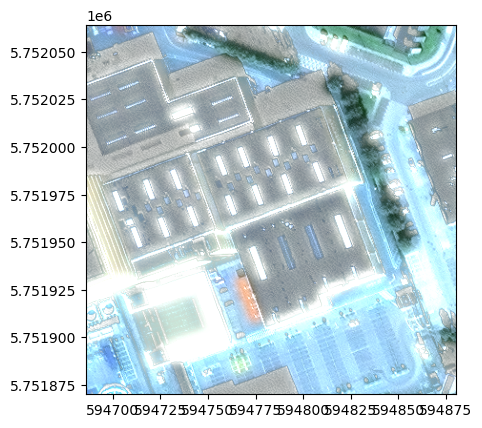

<Axes: >

In [15]:
show(src.read(window=win), transform=src.transform)

In [16]:
gdf = geopandas.read_file(test_geo, window=win)

In [17]:
gdf

,roof_075mean,roof_075median,roof_075stdev,Building_ID,origarea,origlen,partialDec,truncated,geometry
0,10.270000,10.270000,0.000000,35158,701.902548,0,0.006364,1,"POLYGON Z ((595134.299 5751614.179 0.000, 5951..."
1,3.550000,3.550000,0.000000,35184,12.561355,0,1.000000,0,"POLYGON Z ((595122.494 5751616.252 0.000, 5951..."
2,7.140000,7.140000,0.000000,34855,51.962709,0,1.000000,0,"POLYGON Z ((595111.980 5751665.246 0.000, 5951..."
3,33.205057,35.509998,15.294426,46092,22082.008630,0,0.937484,1,"POLYGON Z ((594978.409 5751672.435 0.000, 5949..."
4,12.658299,12.660000,0.003757,46144,1530.005711,0,0.553941,1,"POLYGON Z ((595136.134 5751702.000 0.000, 5951..."
5,7.420000,7.420000,0.000000,35315,7.756448,0,1.000000,0,"POLYGON Z ((595085.101 5751745.023 0.000, 5950..."
6,13.440000,13.440000,0.000000,46452,241.693631,0,1.000000,0,"POLYGON Z ((595112.596 5751789.736 0.000, 5951..."
7,10.520000,10.520000,0.000000,46483,583.097525,0,1.000000,0,"POLYGON Z ((595098.410 5751798.421 0.000, 5950..."
8,14.230000,14.230000,0.000000,46484,523.055343,0,0.544858,1,"POLYGON Z ((594706.885 5751817.403 0.000, 5947..."
9,7.600000,7.600000,0.000000,45657,14.744508,0,1.000000,0,"POLYGON Z ((595081.815 5751823.023 0.000, 5950..."


In [18]:
len(gdf)

27

In [19]:
gdf['geometry']

0     POLYGON Z ((595134.299 5751614.179 0.000, 5951...
1     POLYGON Z ((595122.494 5751616.252 0.000, 5951...
2     POLYGON Z ((595111.980 5751665.246 0.000, 5951...
3     POLYGON Z ((594978.409 5751672.435 0.000, 5949...
4     POLYGON Z ((595136.134 5751702.000 0.000, 5951...
5     POLYGON Z ((595085.101 5751745.023 0.000, 5950...
6     POLYGON Z ((595112.596 5751789.736 0.000, 5951...
7     POLYGON Z ((595098.410 5751798.421 0.000, 5950...
8     POLYGON Z ((594706.885 5751817.403 0.000, 5947...
9     POLYGON Z ((595081.815 5751823.023 0.000, 5950...
10    POLYGON Z ((595041.950 5751819.913 0.000, 5950...
11    POLYGON Z ((594713.951 5751815.235 0.000, 5947...
12    POLYGON Z ((594834.732 5751803.870 0.000, 5948...
13    POLYGON Z ((594984.347 5751852.247 0.000, 5949...
14    POLYGON Z ((594888.879 5751861.192 0.000, 5949...
15    POLYGON Z ((594759.173 5751830.976 0.000, 5947...
16    POLYGON Z ((594958.432 5751861.361 0.000, 5949...
17    POLYGON Z ((594943.386 5751858.574 0.000, 

<Axes: >

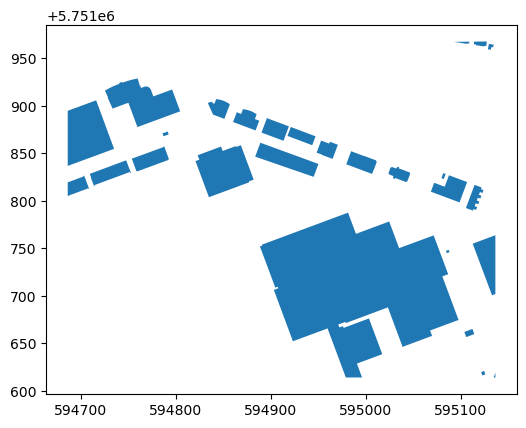

In [20]:
gdf['geometry'].plot()

In [21]:
def plot_gdf(gdf,fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            # TODO fix bc missing data
            pass
    return(ax)

<Axes: >

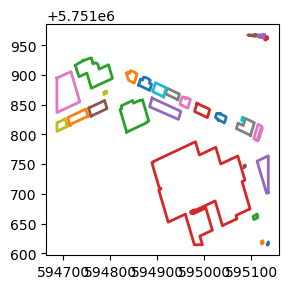

In [22]:
plot_gdf(gdf)

In [23]:
def plot_sat(path,gdf=None, fill=False,linewidth=2):
    f, ax = plt.subplots(1,figsize=(3, 3))
    f.tight_layout()
    
    r = rio.open(path)
    r = r.read()
    r = r.transpose((1,2,0,))
    
    if gdf is not None:
        ax = plot_gdf(gdf,fill=fill,ax=ax,linewidth=linewidth)
    ax.imshow(r)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


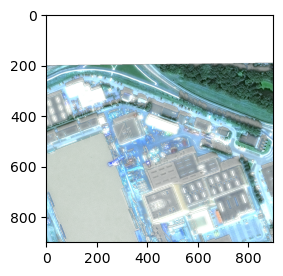

In [24]:
plot_sat(test_tif, gdf)

In [347]:
def create_meshgrid(src, step=200):

    def to_pixel_coords(relative_coords, src):
        return tuple(round(coord // dimension) for coord, dimension in zip(relative_coords, src.shape))

    left, bottom = to_pixel_coords((src.bounds.left, src.bounds.bottom), src) 
    
    right, top = to_pixel_coords((src.bounds.right, src.bounds.top), src)
    
    minc = min([left, bottom, right, top])
    
#     return (left, bottom, right, top)
    xx, yy = numpy.meshgrid(numpy.arange(left-minc, bottom, step), 
                                numpy.arange(right-minc, top, step))

    x = [z for x in xx for z in x]
    y = [z for x in yy for z in x]

    plt.plot(xx.flat, yy.flat, ".")
    plt.show()

    return list(zip(x, y))

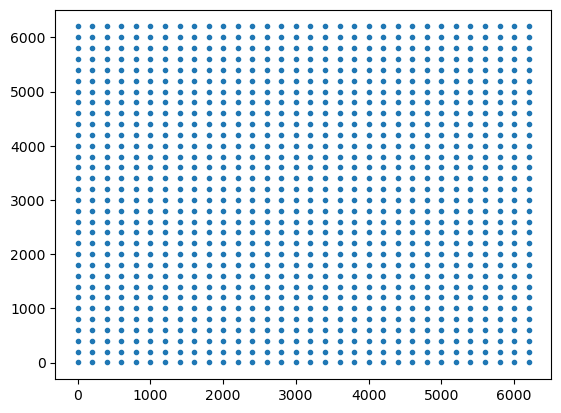

[(0, 1),
 (200, 1),
 (400, 1),
 (600, 1),
 (800, 1),
 (1000, 1),
 (1200, 1),
 (1400, 1),
 (1600, 1),
 (1800, 1),
 (2000, 1),
 (2200, 1),
 (2400, 1),
 (2600, 1),
 (2800, 1),
 (3000, 1),
 (3200, 1),
 (3400, 1),
 (3600, 1),
 (3800, 1),
 (4000, 1),
 (4200, 1),
 (4400, 1),
 (4600, 1),
 (4800, 1),
 (5000, 1),
 (5200, 1),
 (5400, 1),
 (5600, 1),
 (5800, 1),
 (6000, 1),
 (6200, 1),
 (0, 201),
 (200, 201),
 (400, 201),
 (600, 201),
 (800, 201),
 (1000, 201),
 (1200, 201),
 (1400, 201),
 (1600, 201),
 (1800, 201),
 (2000, 201),
 (2200, 201),
 (2400, 201),
 (2600, 201),
 (2800, 201),
 (3000, 201),
 (3200, 201),
 (3400, 201),
 (3600, 201),
 (3800, 201),
 (4000, 201),
 (4200, 201),
 (4400, 201),
 (4600, 201),
 (4800, 201),
 (5000, 201),
 (5200, 201),
 (5400, 201),
 (5600, 201),
 (5800, 201),
 (6000, 201),
 (6200, 201),
 (0, 401),
 (200, 401),
 (400, 401),
 (600, 401),
 (800, 401),
 (1000, 401),
 (1200, 401),
 (1400, 401),
 (1600, 401),
 (1800, 401),
 (2000, 401),
 (2200, 401),
 (2400, 401),
 (2600,

In [348]:
create_meshgrid(src)

In [27]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [28]:
import math

# This function gets just one pair of coordinates based on the angle theta
def get_circle_coord(theta, x_center, y_center, radius):
    x = radius * math.cos(theta) + x_center
    y = radius * math.sin(theta) + y_center
    return (x,y)

# This function gets all the pairs of coordinates
def get_all_circle_coords(x_center, y_center, radius, n_points):
    thetas = [i/n_points * math.tau for i in range(n_points)]
    circle_coords = [get_circle_coord(theta, x_center, y_center, radius) for theta in thetas]
    return circle_coords

def circle_coords_fn(x_center, y_center, radius, n_points):
    """
    Compute circle coordinates using a center point (x, y)
    and radius. The number of coordinates computed is n_points.
    """
    
    thetas = [i/n_points * math.tau for i in range(n_points)]
    
    return [(radius*math.cos(theta)+x_center, radius*math.sin(theta)+y_center) for theta in thetas]


# Using the second function to generate all the pairs of coordinates.
# circle_coords = circle_coords_fn(x_center = 595134, 
#                                       y_center = 5751614,
#                                       radius = 30,
#                                       n_points = 100)

In [29]:
def plot_gdf_circle(gdf, circ, fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
    
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            pass
    ax.plot(*circ.exterior.xy, linewidth=linewidth)
    
    return(ax)

In [30]:
def plot_gdf_circles(gdf, circs, fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            pass
    for circ in circs:
        ax.plot(*circ.exterior.xy, linewidth=linewidth)
        ax.axis('tight')
    return(ax)

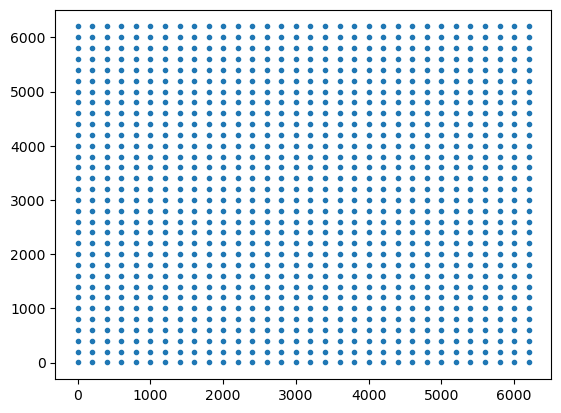

In [31]:
circle_coords = create_meshgrid(src)

In [155]:
max(circle_coords)

(6200, 6201)

In [186]:
circle_coords

[(0, 1),
 (200, 1),
 (400, 1),
 (600, 1),
 (800, 1),
 (1000, 1),
 (1200, 1),
 (1400, 1),
 (1600, 1),
 (1800, 1),
 (2000, 1),
 (2200, 1),
 (2400, 1),
 (2600, 1),
 (2800, 1),
 (3000, 1),
 (3200, 1),
 (3400, 1),
 (3600, 1),
 (3800, 1),
 (4000, 1),
 (4200, 1),
 (4400, 1),
 (4600, 1),
 (4800, 1),
 (5000, 1),
 (5200, 1),
 (5400, 1),
 (5600, 1),
 (5800, 1),
 (6000, 1),
 (6200, 1),
 (0, 201),
 (200, 201),
 (400, 201),
 (600, 201),
 (800, 201),
 (1000, 201),
 (1200, 201),
 (1400, 201),
 (1600, 201),
 (1800, 201),
 (2000, 201),
 (2200, 201),
 (2400, 201),
 (2600, 201),
 (2800, 201),
 (3000, 201),
 (3200, 201),
 (3400, 201),
 (3600, 201),
 (3800, 201),
 (4000, 201),
 (4200, 201),
 (4400, 201),
 (4600, 201),
 (4800, 201),
 (5000, 201),
 (5200, 201),
 (5400, 201),
 (5600, 201),
 (5800, 201),
 (6000, 201),
 (6200, 201),
 (0, 401),
 (200, 401),
 (400, 401),
 (600, 401),
 (800, 401),
 (1000, 401),
 (1200, 401),
 (1400, 401),
 (1600, 401),
 (1800, 401),
 (2000, 401),
 (2200, 401),
 (2400, 401),
 (2600,

In [33]:
circ = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 1, 100)) for circ_coors in circle_coords]

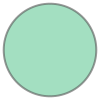

In [128]:
circ[1]

In [35]:
circ[1].bounds

(199.0, 0.0, 201.0, 2.0)

In [36]:
type(circ[1])

shapely.geometry.polygon.Polygon

In [349]:
gdf = geopandas.read_file(test_geo, window=win)

<Axes: >

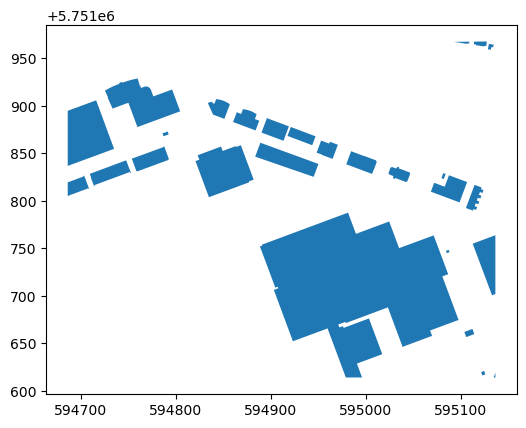

In [350]:
# value of pins, # intersection not empty
# size of pin
testgdf = gdf
testgdf['geometry'].plot()

In [351]:
# [poly.bounds for poly in testgdf['geometry']]

In [352]:
def pixel_transform(polygon, crcoords, rad):
    
    hi = max(max(crcoords))
    lo = 0
    
    xHiNew, yHiNew = (hi, hi)
    xLoNew, yLoNew = (lo, lo)
                 
    xLoOld, yLoOld, xHiOld, yHiOld = polygon.bounds
    
#     print(xLoOld, yLoOld, xHiOld, yHiOld)

    centroid = polygon.centroid
    centerX, centerY = centroid.x, centroid.y
    
#     print(centerX, centerY)

    newX = (centerX-xLoOld) / (xHiOld-xLoOld) * (xHiNew-xLoNew) + xLoNew
    newY = (centerY-yLoOld) / (yHiOld-yLoOld) * (yHiNew-yLoNew) + yLoNew
    
#     print(newX, newY)
    
    return Polygon(circle_coords_fn(newX, newY, rad, 100))

In [353]:
testgdf['geometry'] = testgdf['geometry'].apply(lambda x: pixel_transform(x, circle_coords, 150))

<Axes: >

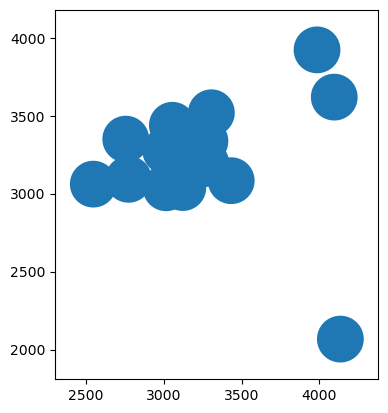

In [354]:
# should start at zero
# drop pins, and count fraction of blue pixels around pins
testgdf['geometry'].plot()

In [355]:
testgdf['geometry']

0     POLYGON ((4283.983 2067.118, 4283.687 2076.537...
1     POLYGON ((3245.766 3120.717, 3245.470 3130.135...
2     POLYGON ((3250.561 3100.362, 3250.265 3109.781...
3     POLYGON ((3206.473 3438.596, 3206.177 3448.015...
4     POLYGON ((4244.787 3619.020, 4244.491 3628.439...
5     POLYGON ((3260.608 3099.501, 3260.312 3108.919...
6     POLYGON ((3166.296 3037.630, 3166.000 3047.049...
7     POLYGON ((3583.976 3083.053, 3583.680 3092.471...
8     POLYGON ((2924.969 3091.963, 2924.673 3101.381...
9     POLYGON ((3250.526 3100.674, 3250.230 3110.093...
10    POLYGON ((3307.308 3222.073, 3307.012 3231.491...
11    POLYGON ((3207.221 3219.856, 3206.925 3229.274...
12    POLYGON ((3164.116 3275.087, 3163.820 3284.506...
13    POLYGON ((3285.006 3103.728, 3284.710 3113.147...
14    POLYGON ((3222.490 3077.298, 3222.194 3086.717...
15    POLYGON ((3273.661 3039.115, 3273.365 3048.533...
16    POLYGON ((3286.349 3241.940, 3286.053 3251.358...
17    POLYGON ((3250.500 3100.500, 3250.204 3109

<Axes: >

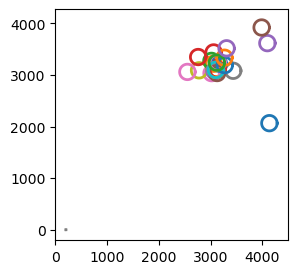

In [356]:
plot_gdf_circle(testgdf, circ[1])

In [357]:
def generate_pin_counts(data_list, rad=20, center_rad=150, step=100, stop=6, crs='epsg:32631'):
    """
    Generate random pins (x, y) and count of buildings 
    in a given list of geojsons
    """
    out = []
    N = 0
    for rastr, geojs in data_list:
        src = rio.open(rastr)
        grid = create_meshgrid(src, step=step)
        gdf = geopandas.read_file(geojs, window=window)
        try:
            circs = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 10, 100)) for circ_coors in grid]
            gdf['geometry'] = gdf['geometry'].apply(lambda x: pixel_transform(x, grid, center_rad))
            circ_gdfs = [geopandas.GeoDataFrame(index=[0], geometry=[circ]) for circ in circs]
            xy = list(zip(circs, grid))
            plot_gdf_circles(gdf, circs)
            # (x, y) -> (circ, pt)
            lst = [((y[0], y[1]), len(geopandas.sjoin(geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[x]), gdf))) for x,y in xy]
            out.append([rastr, [x for x, _ in lst], [y for _, y in lst]])
        except IndexError:
            pass
        N += 1
        if N >= stop:
            break
    return out

In [358]:
import time

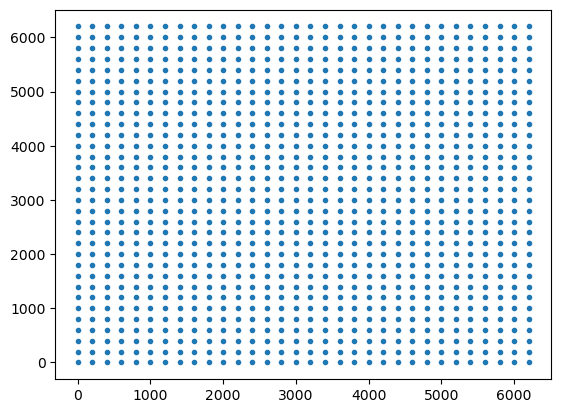

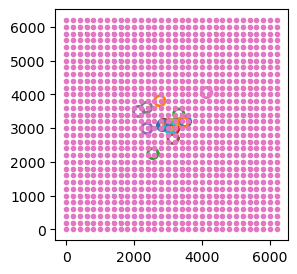

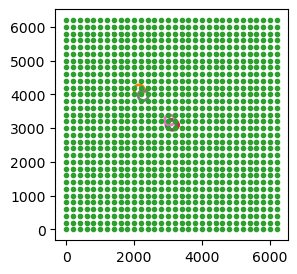

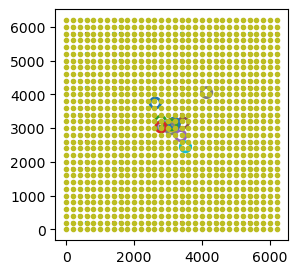

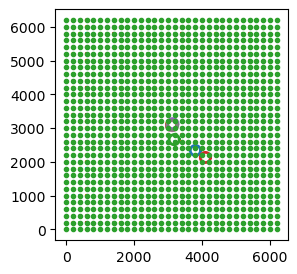

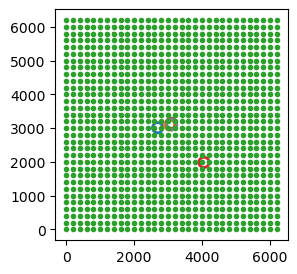

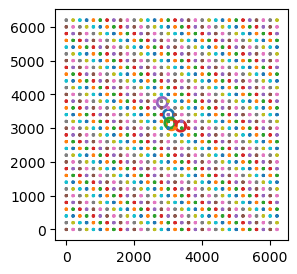

In [359]:
# grid is too fine >> test different configurations
# 1) no. of intersecting polygons
# 2) intersecting areas, sum of areas

# set stop to len(data_list) for complete data generation
start_time = time.time()
out = generate_pin_counts(datas, rad=50, center_rad=150, step=200, stop=6)
elapsed_time = time.time() - start_time

In [360]:
[max(out[i][2]) for i in range(len(out))]

[10, 6, 14, 5, 6, 2]

In [361]:
[np.nonzero(out[i][2]) for i in range(len(out))]

[(array([365, 397, 432, 464, 492, 494, 495, 496, 526, 527, 528, 529, 530,
         555, 560, 561, 587, 588, 621, 622, 660, 661]),),
 (array([495, 496, 527, 528, 651, 652, 683]),),
 (array([401, 402, 465, 494, 495, 496, 526, 527, 528, 529, 589, 621, 660,
         661]),),
 (array([371, 372, 373, 403, 432, 464, 495, 496, 527, 528]),),
 (array([340, 341, 493, 494, 495, 496, 527, 528]),),
 (array([495, 496, 497, 527, 528, 529, 559, 622]),)]

In [362]:
elapsed_time

76.78768110275269